In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img1 = cv2.imread(r"OriginalImage.tif",cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(r"C:\Users\23675\OneDrive\桌面\Second Year\Fundamentals of Computer Vision\assignment 1\Números 2, fondo apagdo.bmp",cv2.IMREAD_GRAYSCALE)
cv2.imshow("img1",img1)
cv2.waitKey(0)
cv2.destroyAllWindows()



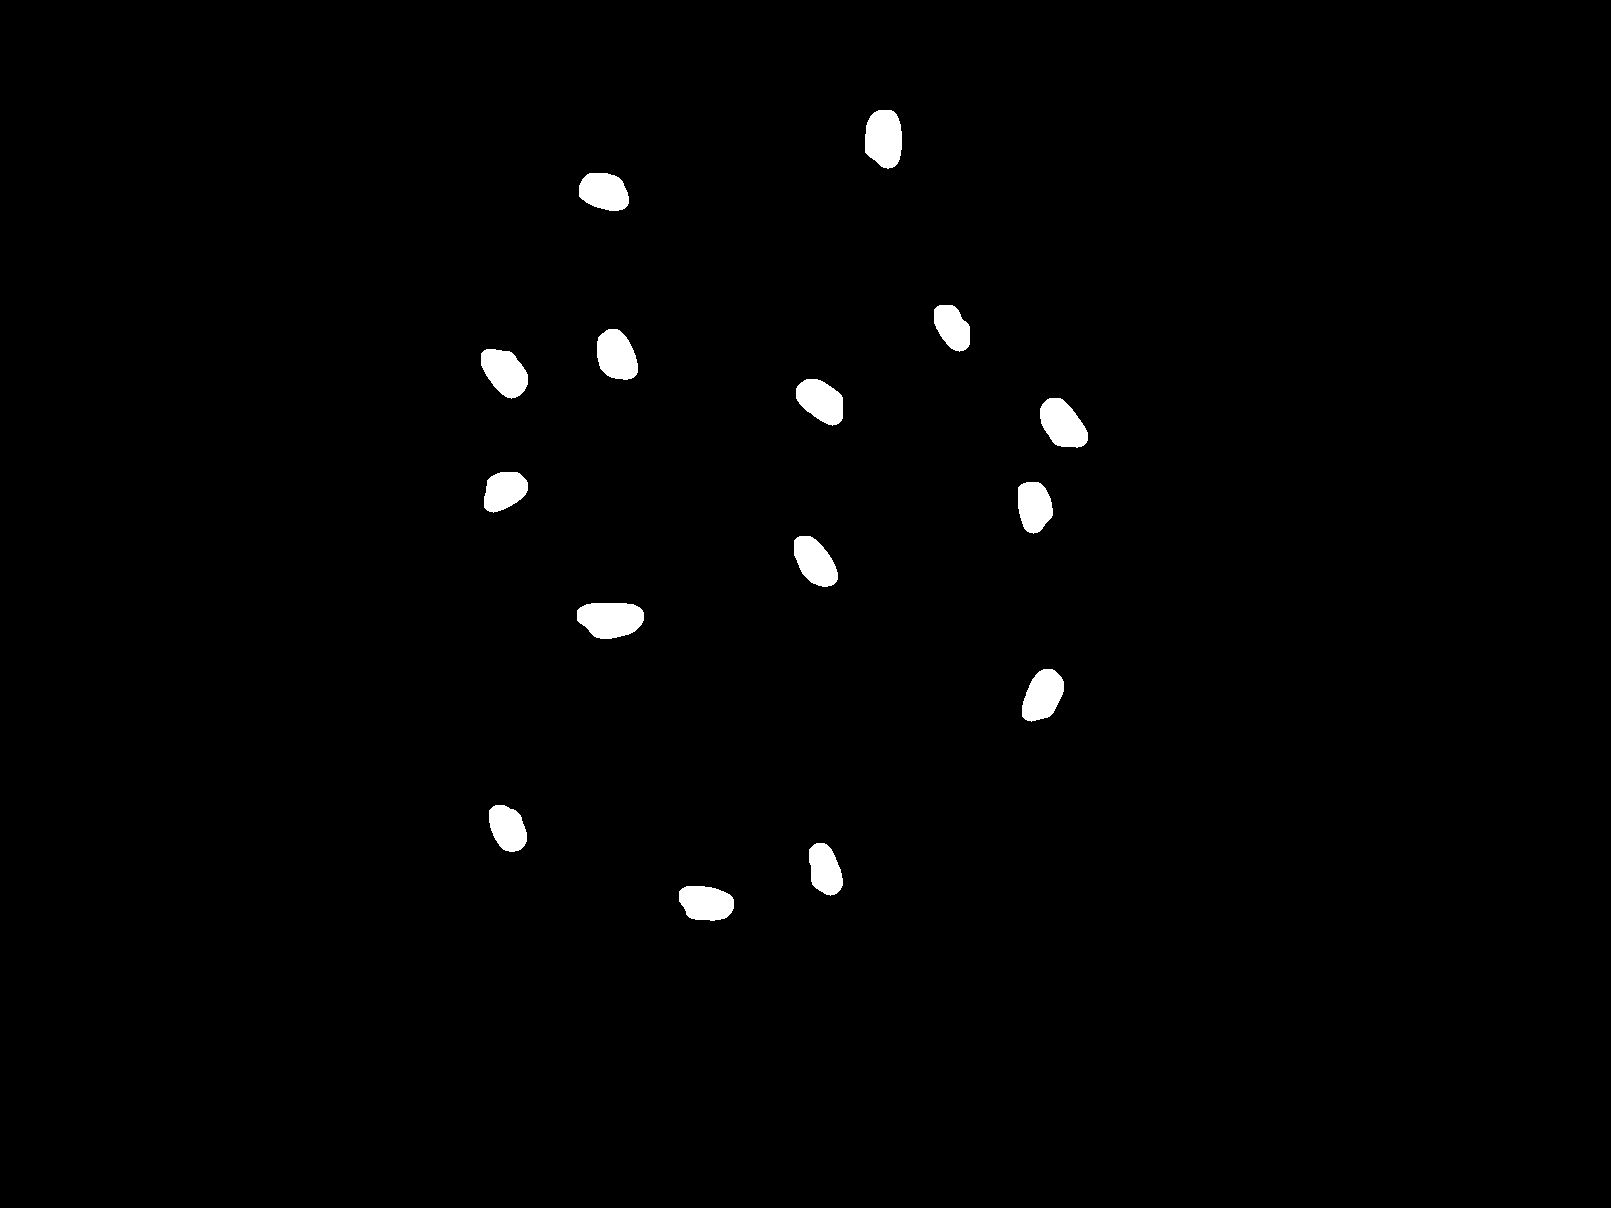

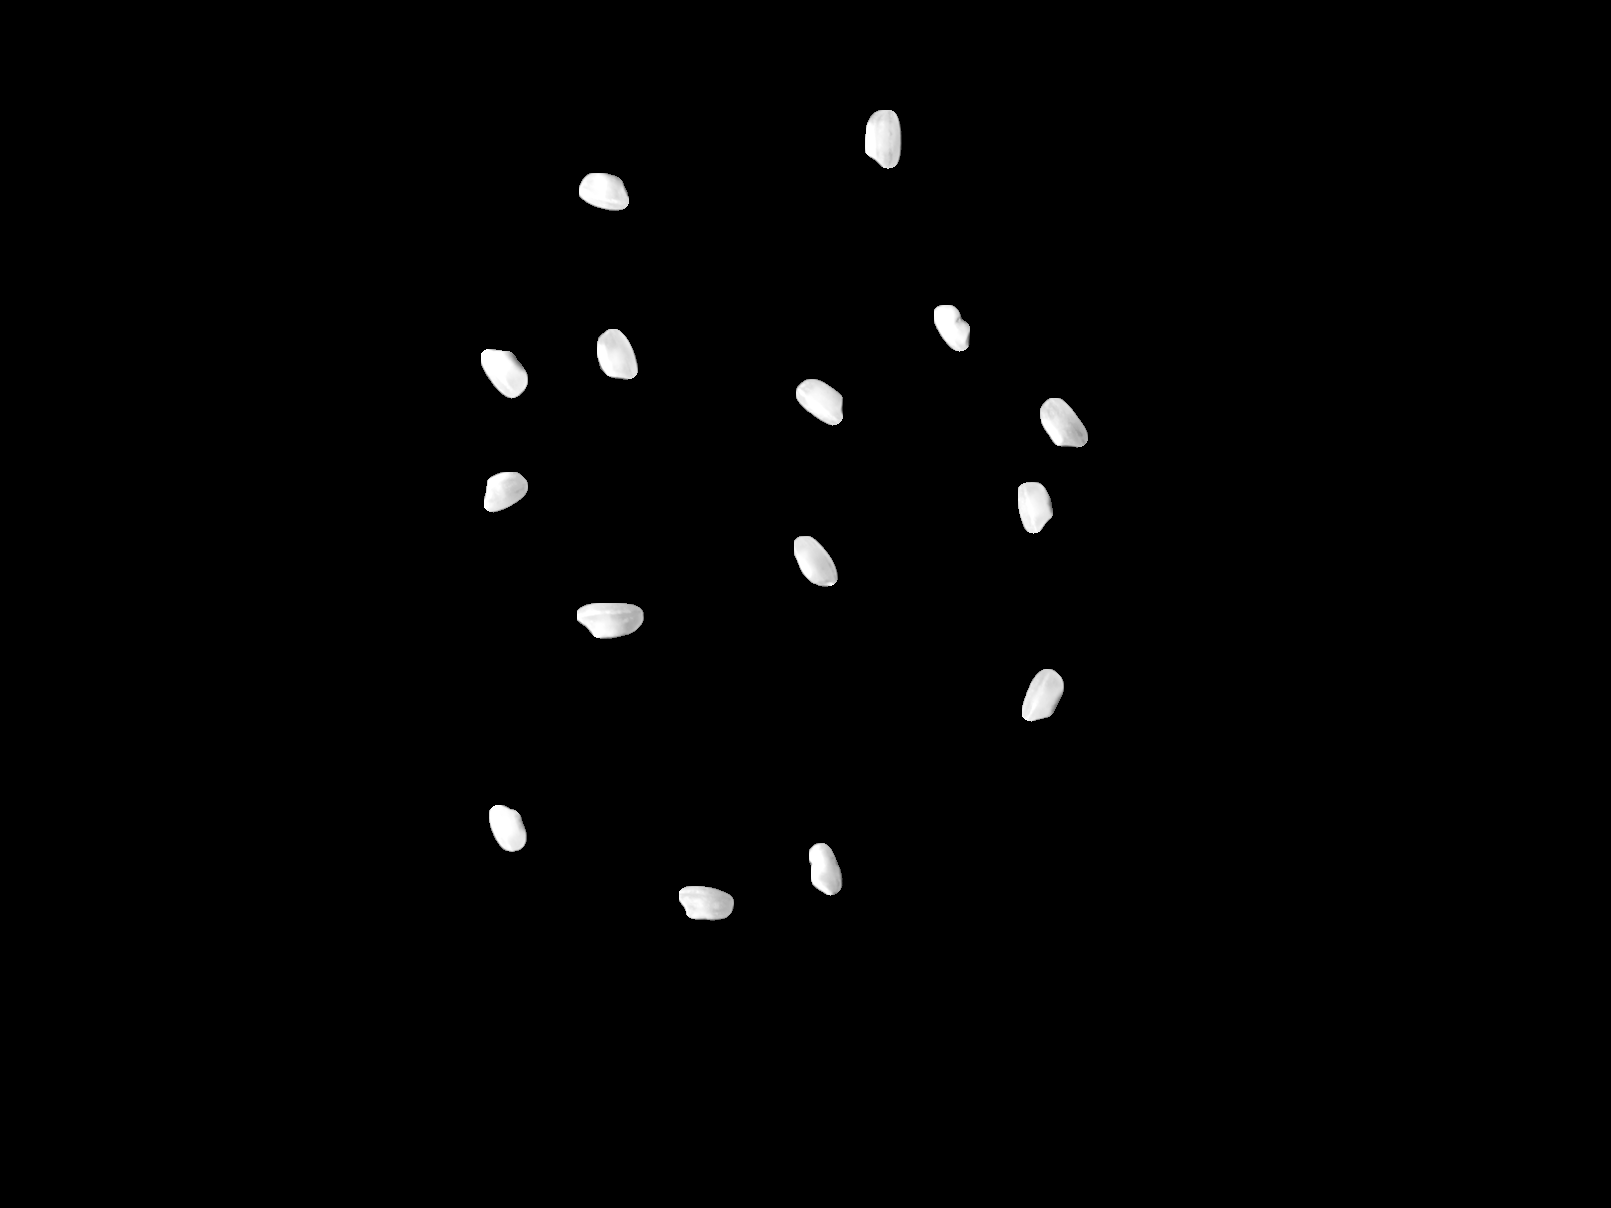

15 rice
39 grains
11 spaghetti


In [17]:
import cv2
# compressed zip
# python file for counting and another for originalimage
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_log
import cv2
import numpy as np
from PIL import Image
# to show the plot in the jupyter notebook
def show(x):
    display(Image.fromarray(x))
original =cv2.imread("OriginalImage.tif", cv2.IMREAD_COLOR)
im = cv2.imread("OriginalImage.tif", cv2.IMREAD_GRAYSCALE)
# binarize the image
im_bw, th = cv2.threshold(im, 100, 255, cv2.THRESH_BINARY)


r_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))

rice = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel=r_kernel)

rg_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
grain_rice = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel=rg_kernel)

grain = grain_rice - rice
f_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
grain = cv2.morphologyEx(grain, cv2.MORPH_OPEN, kernel=f_kernel)
# cv2.imshow("grain", grain)


spaghetti = th - grain_rice
#exactly the same f_kernel as before that gives back the spaghetti.
f_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))

spaghetti = cv2.morphologyEx(spaghetti, cv2.MORPH_OPEN, kernel=f_kernel)
# cv2.imshow("spaghetti", spaghetti)

#################
rice_blobs = blob_log(rice, max_sigma=100, min_sigma=15,
                      num_sigma=3, threshold=0.3, overlap=0.4)
grain_blobs = blob_log(grain, max_sigma=100, min_sigma=10,
                       num_sigma=3, threshold=0.3, overlap=0.4)
#It is not necessary do blob upon spaghetti
#Contour is spaghetti
contours, hierarchy = cv2.findContours(
    spaghetti, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


rice_gray = cv2.bitwise_and(im, im, mask=rice)
grain_gray = cv2.bitwise_and(im, im, mask=grain)
spaghetti_gray = cv2.bitwise_and(im, im, mask=spaghetti)


print(f'{len(rice_blobs)} rice')
print(f'{len(grain_blobs)} grains')
print(f'{len(contours)} spaghetti')





cv2.waitKey(0)
cv2.destroyAllWindows()


#your job now is to find the exact size of the kernels, so they have to be relative to the input image size (not hard coded)




    

In [11]:
#kernel 
r_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
rice = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel=r_kernel)

rice_blobs = blob_log(rice, max_sigma=100, min_sigma=15,
                      num_sigma=3, threshold=0.3, overlap=0.4)
rice_gray = cv2.bitwise_and(im, im, mask=rice)

score = abs(im - rice_gray)
print(np.mean(score))


NameError: name 'mean' is not defined

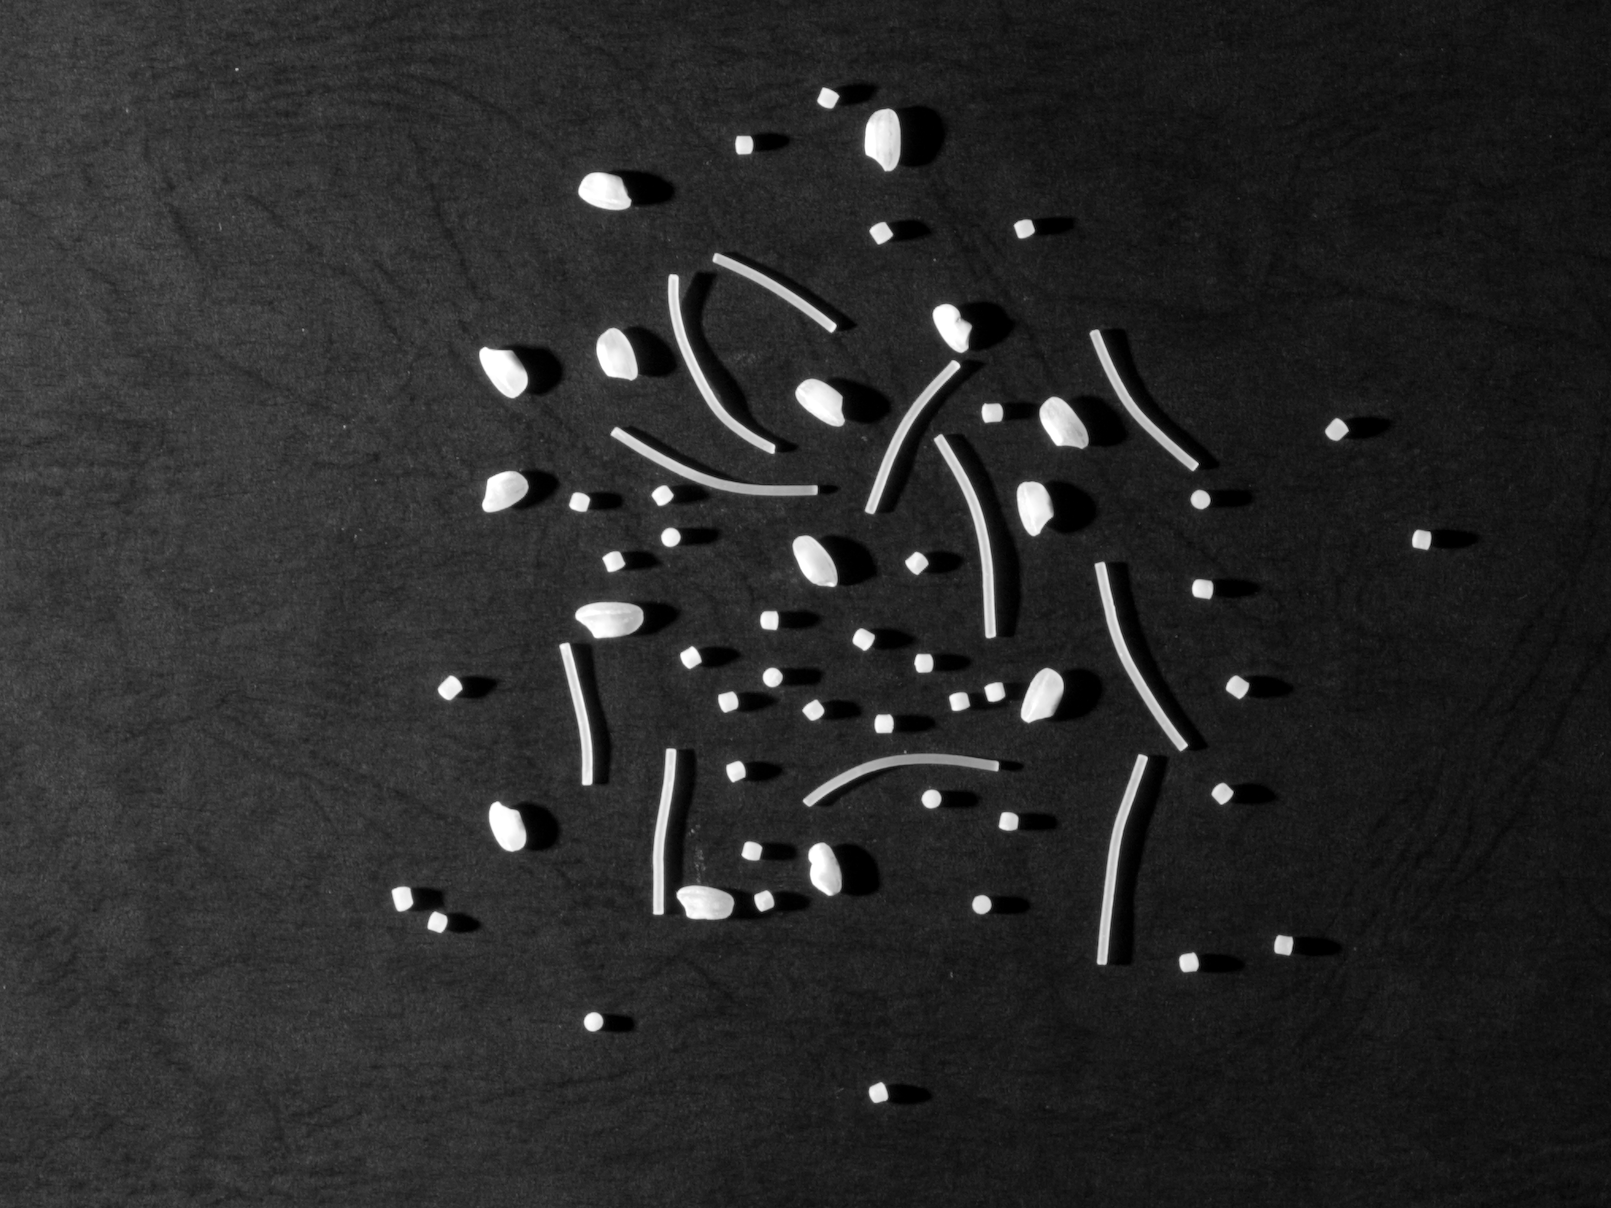

In [8]:
show(im)

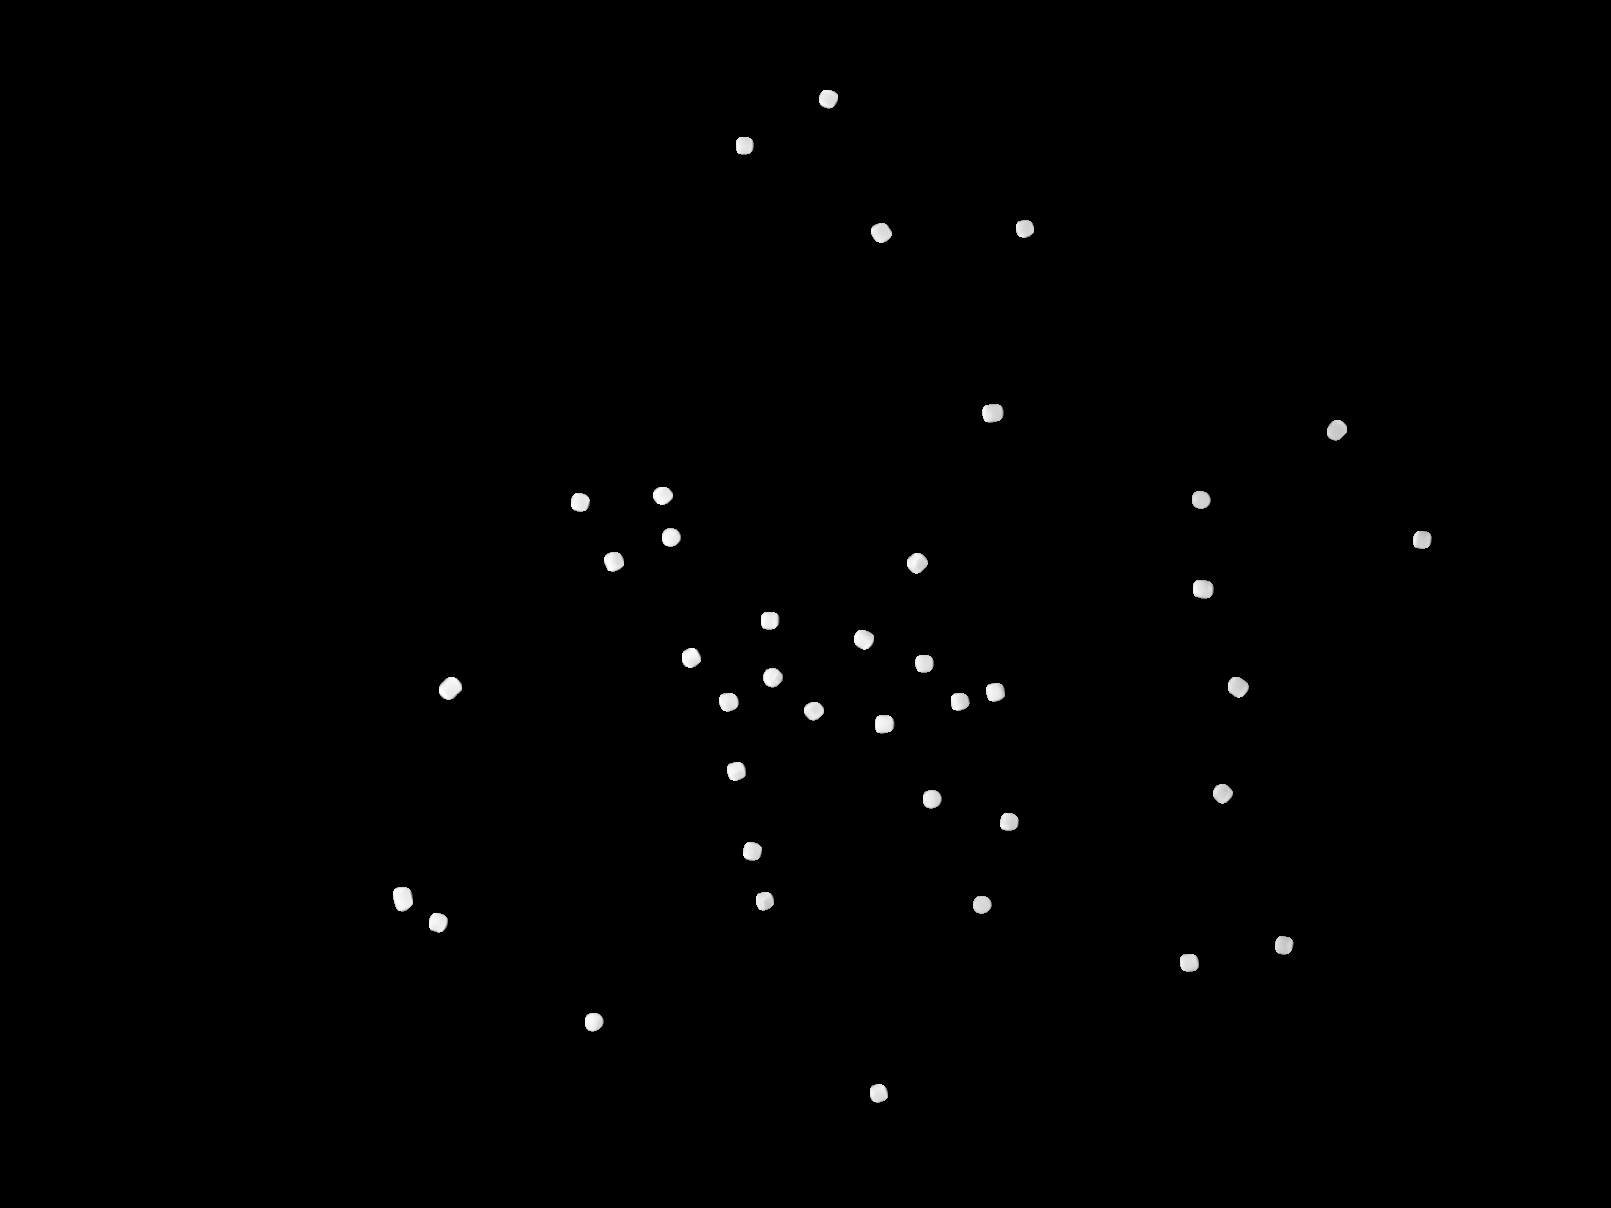

In [7]:
show(grain_gray)

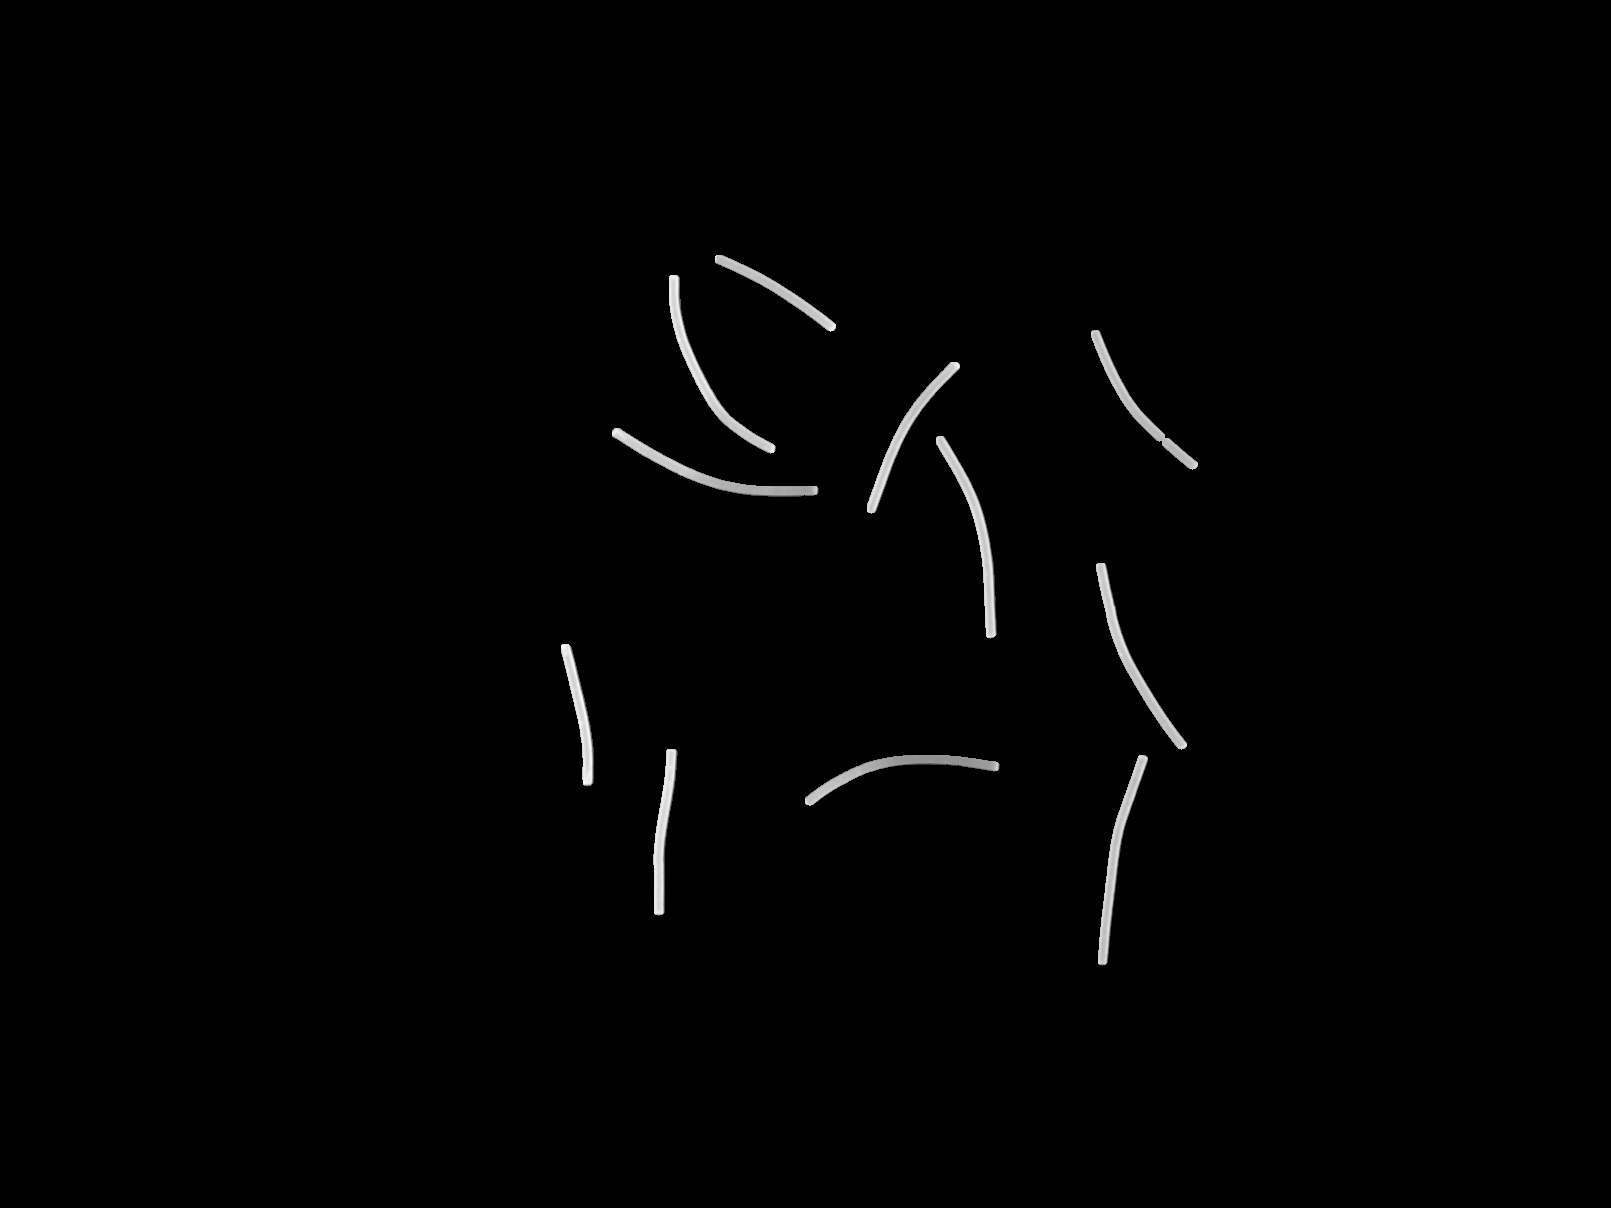

In [5]:
show(spaghetti_gray)

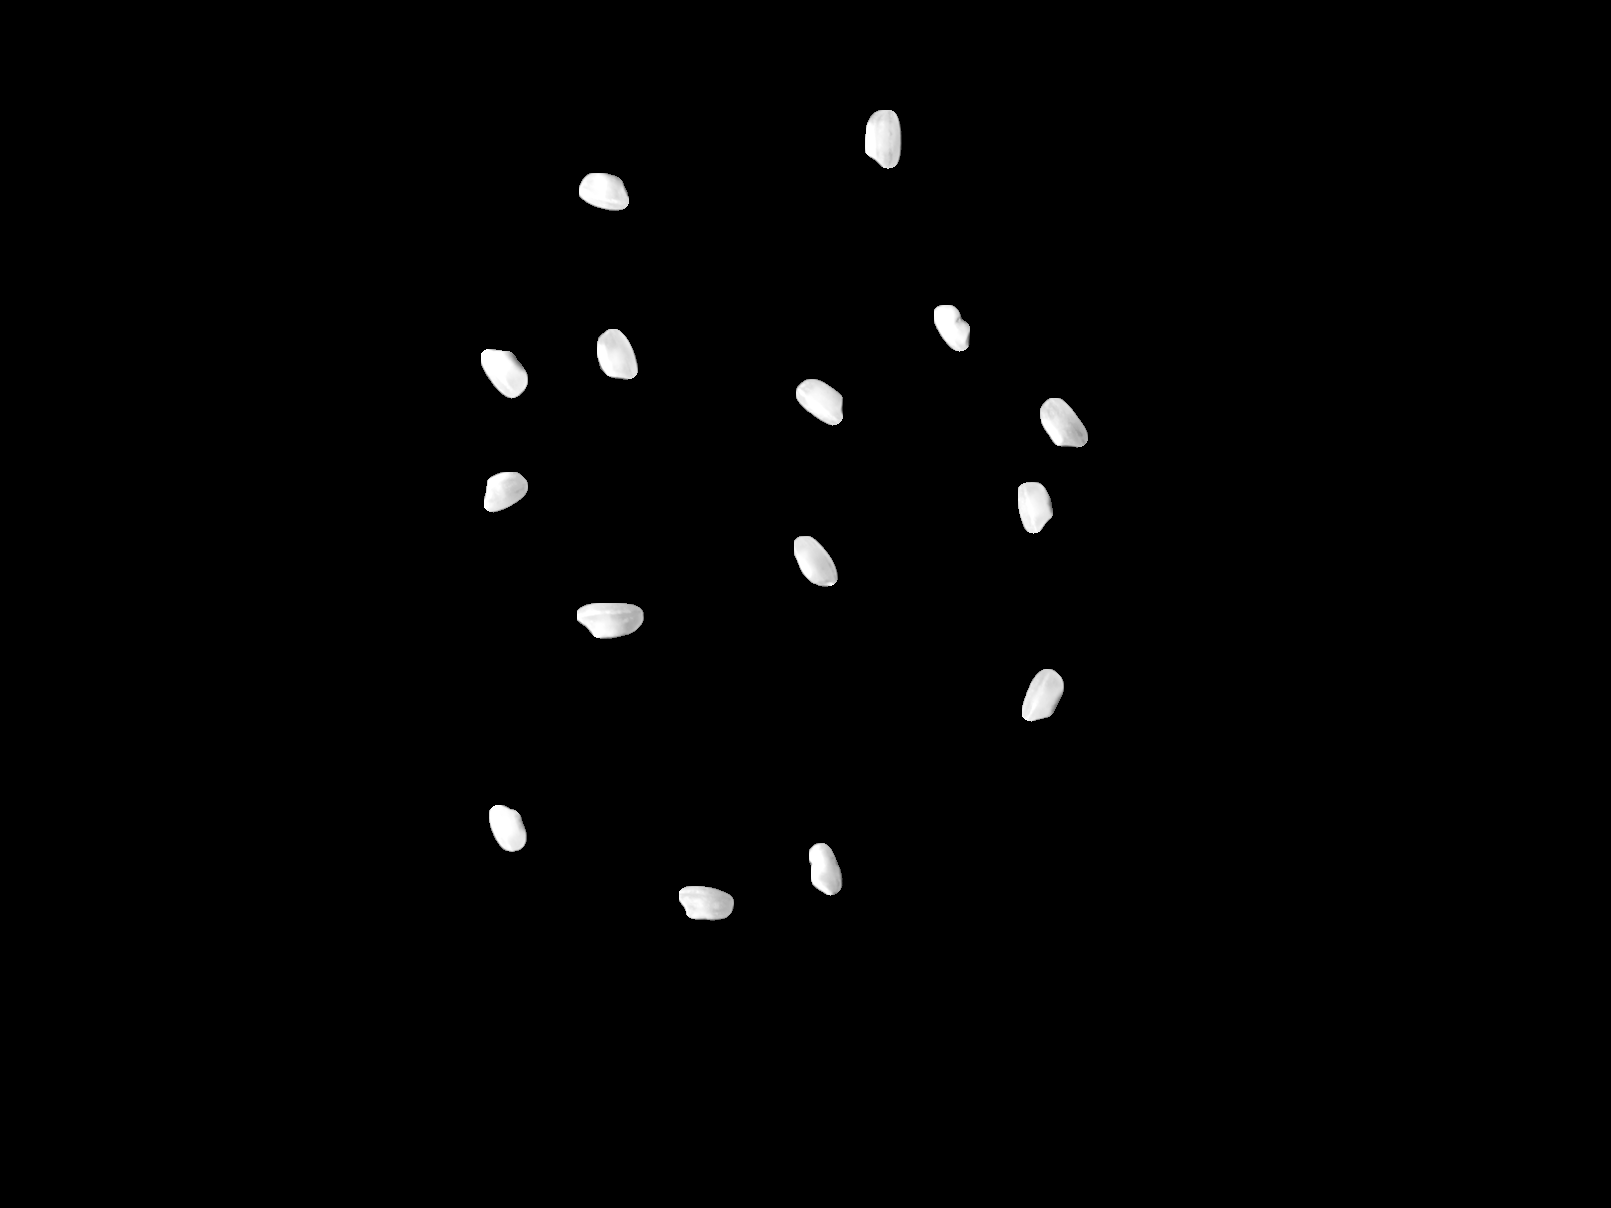

In [6]:
show(rice_gray)